# Heroes of Pymoli Data Analysis
 - The majority of players are male and between the ages of 15-24. Spending on items does not vary significantly between ages and genders.
 - The three most profitable items are also three of the most popular, meaning higher prices do not deter players from buying good items.
 - The average purchase per player is \\$4.13, the five players with the highest purchase values range from \\$13.10-\\$18.96. This is more than 3 times the average purchase.

In [1]:
#Dependencies and files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

inputfile = "resources/purchase_data.csv"
heroes_df = pd.read_csv(inputfile)

In [2]:
#find general info about dataframe
heroes_df.columns

Index(['Purchase ID', 'SN', 'Age', 'Gender', 'Item ID', 'Item Name', 'Price'], dtype='object')

### Player Count

In [3]:
#count of unique names
players = heroes_df["SN"].nunique()

#data table
player_count =pd.DataFrame({"Number of Players":[players]})
player_count

,Number of Players
0,576


### Purchase Analysis (Total)

In [4]:
#find number of unique items
items = heroes_df["Item Name"].nunique()
#find average purchase price
avg_price = heroes_df["Price"].mean()
#total number of purchases
total_pur = len(heroes_df)
#total revenue
total_rev = heroes_df["Price"].sum()
#format $ values
avg_price_f = "${:,.2f}".format(avg_price)
total_rev_f = "${:,.2f}".format(total_rev)

#display in table
pur_analysis = pd.DataFrame({"Number of Unique Items":[items],"Average Purchase Price":[avg_price_f],"Total Number of Purchases":[total_pur],"Total Revenue":[total_rev_f]})
pur_analysis

,Number of Unique Items,Average Purchase Price,Total Number of Purchases,Total Revenue
0,179,$3.05,780,"$2,379.77"


### Gender Demographics

In [5]:
#groupby gender
#add SN to filter out multiple purchases by same player name
gender_df = heroes_df.groupby("Gender").SN.nunique()
#gather data
male = gender_df["Male"]
female = gender_df["Female"]
other = gender_df["Other / Non-Disclosed"]

#calculate percentages, add formatting
male_per = "{:,.2f}%".format(male/players*100)
female_per = "{:,.2f}%".format(female/players*100)
other_per = "{:,.2f}%".format(other/players*100)

#make table
gender_dem_df = pd.DataFrame({"Gender":["Male","Female","Other / Non-Disclosed"],"Player Count":[male, female, other],"Percentage":[male_per, female_per, other_per]})
gender_dem_df = gender_dem_df.set_index("Gender")
gender_dem_df


,Player Count,Percentage
Gender,,
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%


### Purchase Analysis (Gender)
Breakdown total purchases, average purchase price, total purchase value and average purchase per person by gender

In [6]:
#grouby gender
gender_df_2 = heroes_df.groupby("Gender")
#purchase count series
gender_pur_ct = gender_df_2["Gender"].count()
#average purchase price
gender_avg_pri = gender_df_2["Price"].mean()
#total purchase value
gender_pur = gender_df_2["Price"].sum()
#average purchase per person per gender (using unique counts from line above)
gender_avg_pur = gender_pur/gender_df

#summary df
gender_pur_df = pd.concat([gender_pur_ct, gender_avg_pri, gender_pur, gender_avg_pur], axis=1, 
                          keys=['Total Purchases','Average Purchase Price','Total Purchase Value','Average Purchase per Person'])

In [7]:
#total statistics
    # purchase count = total_pur
    # average purchase price = avg_price
    # total purchase value = total_rev
    # average purchase per person = total_rev/players
total_pur_df = pd.DataFrame({'Gender':['All'],"Total Purchases":[total_pur],"Average Purchase Price":[avg_price],
                             "Total Purchase Value":[total_rev],'Average Purchase per Person':[total_rev/players]})
total_pur_df.set_index('Gender', inplace = True)
total_pur_df

# add to summary dataframe
gender_pur_df = gender_pur_df.append(total_pur_df)

In [8]:
#format df
gender_pur_df["Average Purchase Price"] = gender_pur_df["Average Purchase Price"].map("${:,.2f}".format)
gender_pur_df["Total Purchase Value"] = gender_pur_df["Total Purchase Value"].map("${:,.2f}".format)
gender_pur_df["Average Purchase per Person"] = gender_pur_df["Average Purchase per Person"].map("${:,.2f}".format)
gender_pur_df

,Total Purchases,Average Purchase Price,Total Purchase Value,Average Purchase per Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56
All,780,$3.05,"$2,379.77",$4.13


### Age Demographics

Split dataset into groups of 5-year bins, then find the number of players and percentage of total players in each group

In [9]:
#maximum age data
heroes_df["Age"].max()
#create bins 
bins = [0,10,15,20,25,30,35,40,46]
labels = ["<10","11-14","15-19","20-24","25-29","30-34","35-39","40+"]
#didvide data frame
heroes_df["Age Group"] = pd.cut(heroes_df["Age"], bins, labels=labels)
#groupby age group, couting only unique IDs
heroes_age = heroes_df.groupby(["Age Group"])['SN'].agg('nunique').reset_index()
# rename SN column
age_df = heroes_age.rename(columns={'SN':'Number of Players'})

#percentage of total
age_df['Percentage of Total'] = age_df['Number of Players'].map(lambda x: x/players*100)

In [10]:
#format dataframe
age_df["Percentage of Total"] = age_df["Percentage of Total"].map("{:,.2f}%".format)
age_df.set_index('Age Group', inplace=True)
age_df

,Number of Players,Percentage of Total
Age Group,,
<10,24,4.17%
11-14,41,7.12%
15-19,150,26.04%
20-24,232,40.28%
25-29,59,10.24%
30-34,37,6.42%
35-39,26,4.51%
40+,7,1.22%


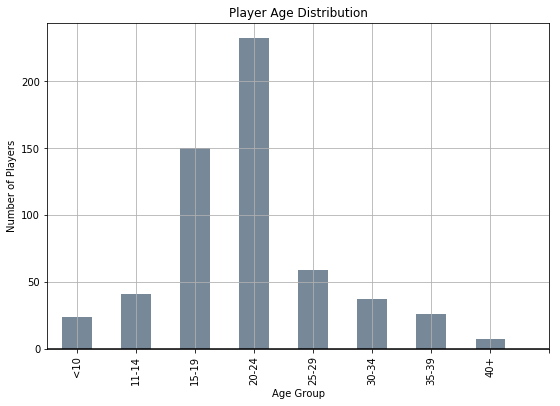

In [11]:
# Age histogram
x = np.arange(0,len(bins))

# Build the bar chart
heroes_age.plot(kind='bar', title = "Player Age Distribution", figsize=(9,6),
               x='Age Group', y='SN', legend=None, color='lightslategrey')

plt.axhline(color="black")
plt.grid(which="major")
plt.xticks(x, labels=labels)
plt.ylabel('Number of Players')


# Save the Figure
plt.savefig("Resources/player_distribution.png")
plt.show()


### Purchase Analysis (Age)
Breakdown total purchases, average purchase price, total purchase value and average purchase per person by age

In [45]:
# Find number of purchases, total purchases, average price and 
# Groupby age and then aggregate
purch_age = heroes_df.groupby(['Age Group']).agg(
    # Purchase count
    {'Age Group':'count',
     # Average price and Total purchase value
     'Price':['mean',sum]})
# Reset multi-index
purch_age.columns = purch_age.columns.droplevel(level=0)
purch_age.reset_index(inplace=True)

# Average per person
purch_age['Average Purchase Per Person'] = purch_age.loc[:,'sum']/heroes_age.loc[:,'SN']

# Rename columns
age_dem_df = purch_age.rename(columns={'count':'Number of Purchases',
                                       'mean':'Average Purchase Price','sum':"Total Purchase Value"})


In [46]:
#format dataframe
age_dem_df["Average Purchase Price"] = age_dem_df["Average Purchase Price"].map("${:,.2f}".format)
age_dem_df["Total Purchase Value"] = age_dem_df["Total Purchase Value"].map("${:,.2f}".format)
age_dem_df["Average Purchase Per Person"] = age_dem_df["Average Purchase Per Person"].map("${:,.2f}".format)
age_df.set_index('Age Group', inplace=True)
age_dem_df

,Age Group,Number of Purchases,Average Purchase Price,Total Purchase Value,Average Purchase Per Person
0,<10,32,$3.40,$108.96,$4.54
1,11-14,54,$2.90,$156.60,$3.82
2,15-19,200,$3.11,$621.56,$4.14
3,20-24,325,$3.02,$981.64,$4.23
4,25-29,77,$2.88,$221.42,$3.75
5,30-34,52,$2.99,$155.71,$4.21
6,35-39,33,$3.40,$112.35,$4.32
7,40+,7,$3.08,$21.53,$3.08


### Top Spenders

In [ ]:
#groupby SN
spenders_df = heroes_df.groupby("SN")
#sum purchases by SN
spender_total = spenders_df["Price"].sum()
#identify top 5 spenders
top_spenders = spender_total.nlargest(5)
#purchases count by SN
spender_pur = spenders_df["SN"].count()
#average purchase price
spender_avg = spenders_df["Price"].mean()

#summary dataframe
top_spender_df = pd.DataFrame({"Number of Purchases":spender_pur,"Average Purchase Price":spender_avg,"Total Purchase Value":spender_total})
top_spender_df = top_spender_df.sort_values("Total Purchase Value", ascending = False)
#format dataframe
top_spender_df["Average Purchase Price"] = top_spender_df["Average Purchase Price"].map('${:,.2f}'.format)
top_spender_df["Total Purchase Value"] = top_spender_df["Total Purchase Value"].map('${:,.2f}'.format)
top_spender_df.head(5)


### Most Popular Items

In [ ]:
#make price dataframe
item_df = heroes_df[["Item ID","Item Name","Price"]]
#groupby ItemID and Item Name
item_grp = item_df.groupby(["Item ID","Item Name"])
#purchase count
item_ct = item_grp["Item ID"].count()
#item price
item_price = item_grp["Price"].unique()
#total purchase value
item_val = item_grp["Price"].sum()

#summary dataframe
popular_df = pd.DataFrame({"Number of Purchases":item_ct, "Item Price":item_price, "Total Purchase Value":item_val})
popular_df = popular_df.sort_values("Number of Purchases", ascending=False)
#format table 
popular_df["Item Price"] = popular_df["Item Price"].astype("float").map("${:,.2f}".format)
popular_df["Total Purchase Value"] = popular_df["Total Purchase Value"].astype("float").map("${:,.2f}".format)
popular_df.head(5)

### Most Profitable Items

In [ ]:
#data frame from above popular_df, change df name because of formatting
profitable_df = pd.DataFrame({"Number of Purchases":item_ct, "Item Price":item_price, "Total Purchase Value":item_val})
#sort by purchase value
profitable_df = profitable_df.sort_values("Total Purchase Value", ascending=False)
#format table
profitable_df["Item Price"] = profitable_df["Item Price"].astype("float").map("${:,.2f}".format)
profitable_df["Total Purchase Value"] = profitable_df["Total Purchase Value"].astype("float").map("${:,.2f}".format)
profitable_df.head(5)